# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Azhar Anas
- **Email:** azharanas2202@gmail.com
- **ID Dicoding:** azhar_anas

## 1. Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren penjualanan dan pendapatan perusahaan sejak awal penjualanan?
- Pertanyaan 2 : Bagaimana performa pengiriman barang ke pelanggan?
- Pertanyaan 3 : Metode pembayaran apa yang paling banyak digunakan oleh pelanggan?
- Pertanyaan 4 : Negara mana saja yang menjadi pelanggan terbanyak?
- Pertanyaan 5 : Kota mana saja yang menjadi pelanggan terbanyak?
- Pertanyaan 6 : (RFM Analysis) Kapan waktu transaksi terakhir yang dilakukan oleh pelanggan?
- Pertanyaan 7 : (RFM Analysis) Seberapa sering pelanggan melakukan pembelian dalam kurun waktu beberapa bulan terakhir?
- Pertanyaan 8 : (RFM Analysis) Berapa rata-rata pengeluaran pelanggan dalam beberapa bulan terakhir?

## 2. Import Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data Wrangling

### 3.1 Gathering Data

#### 3.1.1 Memuat data *customers* -> `customers_df`

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


#### 3.1.2 Memuat data *orders* -> `orders_df`

In [3]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


#### 3.1.3 Memuat data *ordered product* -> `ordered_product_df`

In [4]:
ordered_products_df = pd.read_csv('data/order_items_dataset.csv')
ordered_products_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


#### 3.1.4 Memuat data *payment* -> `payment_df`

In [5]:
payments_df = pd.read_csv('data/order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- `customers_df` menyimpan detail data lokasi customer seperti kota dan negara
- `orders_df` menyimpan detail status pesanan barang dan timestamp pengiriman untuk setiap **customer_id**
- `ordered_products_df` menyimpan detail harga dan produk yang dipesan berdasarkan **order_id**
- `payments_df` menyimpan detail jenis dan total pembayaran yang dilakukan berdasarkan **order_id**

### 3.2 Assessing Data

#### 3.2.1 Menilai Dataframe `customers_df`

-> Tipe data pada dataframe `customers_df` sudah sesuai

In [6]:
# Menampilkan tipe data pada masing-masing kolom
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


-> Tidak ada missing value pada dataframe `customers_df`

In [7]:
# Menampilkan jumlah missing value pada setiap kolom
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

-> Tidak ada data duplikat pada dataframe `customers_df`

In [8]:
# Menampilkan jumlah data duplikat
print('Jumlah duplikasi: ', customers_df.duplicated().sum())

Jumlah duplikasi:  0


-> Tidak ada nilai anomali secara statistik deskriptif pada dataframe `customers_df` karena hanya berisi data numerik yang tidak perlu dihitung (Kode Zip)

In [9]:
# Menampilkan statistik deskriptif dari data
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### 3.2.2 Menilai tabel `orders_df`

-> Tipe data pada kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, **order_estimated_delivery_date** seharusnya datetime, bukan object (string)

In [10]:
# Menampilkan tipe data pada masing-masing kolom
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


-> Terdapat missing value pada kolom **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**

In [11]:
# Menampilkan jumlah missing value pada setiap kolom
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

-> Tidak data duplikat pada dataframe `orders_df`

In [12]:
# Menampilkan jumlah data duplikat
print('Jumlah duplikasi: ',orders_df.duplicated().sum())

Jumlah duplikasi:  0


-> Tidak ada nilai anomali secara statistik deskriptif pada dataframe `orders_df` karena hanya berisi data numerik yang tidak perlu dihitung (nomor id, status order, dan tanggal)

In [13]:
# Menampilkan statistik deskriptif dari data
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### 3.2.3 Menilai tabel `ordered_products_df`

-> Tipe data pada kolom **shipping_limit_date** seharusnya datetime, bukan object (string)

In [14]:
# Menampilkan tipe data pada masing-masing kolom
ordered_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


-> Tidak ada missing value pada dataframe `ordered_products_df`

In [15]:
# Menampilkan jumlah missing value pada setiap kolom
ordered_products_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

-> Tidak ada data duplikat pada dataframe `ordered_products_df`

In [16]:
# Menampilkan jumlah data duplikat
print('Jumlah duplikasi: ', ordered_products_df.duplicated().sum())

Jumlah duplikasi:  0


-> Jika melihat nilai max pada kolom **price** dan **freight_value**, nilai tersebut terlalu besar dibanding dengan nilai mean, std, q1, q2, dan q3 mereka. Hal tersebut kemungkinan adanya outlier

In [17]:
# Menampilkan statistik deskriptif dari data
ordered_products_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### 3.2.4 Menilai tabel `payments_df`

-> Tipe data sudah sesuai pada dataframe `payments_df`

In [18]:
# Menampilkan tipe data pada masing-masing kolom
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


-> Tidak ada missing value pada dataframe `payments_df`

In [19]:
# Menampilkan jumlah missing value pada setiap kolom
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

-> Tidak adadata duplikat pada dataframe `payments_df`

In [20]:
# Menampilkan jumlah data duplikat
print('Jumlah duplikasi: ', payments_df.duplicated().sum())

Jumlah duplikasi:  0


-> Jika melihat nilai max pada kolom **payment_value**, nilai tersebut terlalu besar dibanding dengan nilai mean, std, q1, q2, dan q3 nya. Hal tersebut kemungkinan adanya outlier

In [21]:
# Menampilkan statistik deskriptif dari data
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**

`customers_df`
- Data sudah bersih

`orders_df`
- Memiliki tipe data yang salah pada kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date**
- Memiliki missing value pada kolom **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**

`ordered_products_df`
- Memiliki tipe data yang salah pada kolom **shipping_limit_date**
- Memiliki kemungkinan data outlier pada kolom **price** dan **freight_value**

`payments_df`
- Memiliki kemungkinan data outlier pada kolom **payment_value** 

### 3.3 Cleaning Data

#### 3.3.1 Membersihkan Data `orders_df`

1. Menangani tipe data yang salah

In [22]:
# Mengubah tipe data menjadi datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

# Cek kembali tipe data
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


2. Menangani Missing Value

In [23]:
# Menampilkan missing value berdasarkan kolom 'order_approved_at'
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [24]:
# Menampilkan missing value berdasarkan kolom 'order_delivered_carrier_date'
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [25]:
# Menampilkan missing value berdasarkan kolom 'order_delivered_customer_date'
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [26]:
# Karena banyaknya kolom data lainnya yang memiliki missing value dan dataset cukup besar, maka aman untuk melakukan drop data missing value
orders_df.dropna(axis=0, inplace=True)

# Cek kembali jumlah missing value
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### 3.3.2 Membersihkan Data `ordered_products_df`

1. Menangani tipe data yang salah

In [27]:
# Mengubah tipe data menjadi datetime
ordered_products_df['shipping_limit_date'] = pd.to_datetime(ordered_products_df['shipping_limit_date'])

# Cek kembali tipe data
ordered_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


2. Menangani data outlier

Kolom **price**

In [28]:
# Menghitung IQR dan batas/boundary
q1_price = (ordered_products_df['price']).quantile(0.25)
q3_price = (ordered_products_df['price']).quantile(0.75)
iqr_price = q3_price - q1_price
 
maximum_bound_price = q3_price + (1.5*iqr_price)
minimum_bound_price = q1_price - (1.5*iqr_price)
 
lower_bound_price = ordered_products_df['price'] < minimum_bound_price
upper_bound_price = ordered_products_df['price'] > maximum_bound_price

In [29]:
# Outlier yang kurang dari batas bawah
ordered_products_df[lower_bound_price]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [30]:
# outlier melebihi dari batas atas
ordered_products_df[upper_bound_price]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
16,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.00,11.34
26,0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.00,26.33
30,00137e170939bba5a3134e2386413108,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,2017-11-30 06:30:55,397.00,24.65
39,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29
...,...,...,...,...,...,...,...
112586,ffdc5e3279114c523a09296f8fd28331,1,5e70a4508abd5d19bfe7f110785294c8,328acb143b4a73aad6bee8e734f5d20d,2017-02-14 14:49:23,299.99,17.80
112592,ffde92ba447b33a47d1c04d203f10f41,1,a97cd00f5c1dbfbc7f0f4b6c1032253e,b347677812ea483b0f528eaf8cbc09b7,2017-11-30 14:13:18,278.00,26.70
112632,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.00,20.91
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41


In [31]:
# Menghapus data outlier
ordered_products_df.drop(ordered_products_df[upper_bound_price].index, inplace=True)

Kolom **freight_value**

In [32]:
# Menghitung IQR dan batas/boundary
q1_freight_value = (ordered_products_df['freight_value']).quantile(0.25)
q3_freight_value = (ordered_products_df['freight_value']).quantile(0.75)
iqr_freight_value = q3_freight_value - q1_freight_value
 
maximum_bound_freight_value = q3_freight_value + (1.5*iqr_freight_value)
minimum_bound_freight_value = q1_freight_value - (1.5*iqr_freight_value)
 
lower_bound_freight_value = ordered_products_df['freight_value'] < minimum_bound_freight_value
upper_bound_freight_value = ordered_products_df['freight_value'] > maximum_bound_freight_value

In [33]:
# Outlier yang kurang dari batas bawah
ordered_products_df[lower_bound_freight_value]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.00
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.00
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.00
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.00
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.00
...,...,...,...,...,...,...,...
111497,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.00
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.00
112002,fe6c4a42298295647106b42549a98eea,2,b917d488bd4ad4225f8d046a32e2d122,fa1a9dec3a9940c072684a46728bf1fc,2017-06-15 06:35:08,20.9,1.86
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.00


In [34]:
# outlier melebihi dari batas atas
ordered_products_df[upper_bound_freight_value]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
22,000f25f4d72195062c040b12dce9a18a,1,1c05e0964302b6cf68ca0d15f326c6ba,7c67e1448b00f6e969d365cea6b010ab,2018-03-21 11:10:11,119.99,44.40
59,00254baeb6c932b0a8aeead91fbd02b5,1,18901878788fec7ddc55e64d1ace8187,e8b4225284fbb02d16f200513f1f395d,2018-05-14 22:14:46,149.90,43.11
73,002b430ff89b3a24c31a1170acbbedea,1,cc47c0863559499f01b4cad750929d10,7a67c85e85bb2ce8582c35f2203ad736,2017-06-26 22:10:14,199.99,65.56
78,002f16b7bc4530031b7d90f791b12d8a,1,d54c5b81fc2b38707588dd4eddc7c594,0241d4d5d36f10f80c644447315af0bd,2018-07-04 17:11:12,249.90,34.23
80,002f98c0f7efd42638ed6100ca699b42,1,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,2017-08-10 09:30:15,8.99,32.57
...,...,...,...,...,...,...,...
112637,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.90,44.02
112640,fffb9224b6fc7c43ebb0904318b10b5f,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [35]:
# Menghapus data outlier
ordered_products_df.drop(ordered_products_df[lower_bound_freight_value].index, inplace=True)
ordered_products_df.drop(ordered_products_df[upper_bound_freight_value].index, inplace=True)

C:\Users\Azhar\AppData\Local\Temp\ipykernel_23124\2468473995.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ordered_products_df.drop(ordered_products_df[upper_bound_freight_value].index, inplace=True)


In [36]:
# Cek kembali hasil statistik deskriptif
ordered_products_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,93975.000000,93975,93975.000000,93975.000000
mean,1.202373,2018-01-05 12:27:56.270454784,79.191667,15.751864
min,1.000000,2016-09-19 00:15:34,0.850000,2.240000
25%,1.000000,2017-09-18 20:42:50.500000,35.700000,12.660000
50%,1.000000,2018-01-24 17:07:28,60.600000,15.350000
75%,1.000000,2018-05-09 12:54:57,109.900000,18.370000
max,21.000000,2020-02-05 03:30:51,277.000000,30.410000
std,0.709123,NaN,55.980034,5.113773


#### 3.3.3 Membersihkan Data `payments_df`

##### 1. Menangani data outlier

In [37]:
# Menghitung IQR dan batas/boundary
q1_payment_value = (payments_df['payment_value']).quantile(0.25)
q3_payment_value = (payments_df['payment_value']).quantile(0.75)
iqr_payment_value = q3_payment_value - q1_payment_value

maximum_bound_payment_value = q3_payment_value + (1.5*iqr_payment_value)
minimum_bound_payment_value = q1_payment_value - (1.5*iqr_payment_value)

lower_bound_payment_value = payments_df['payment_value'] < minimum_bound_payment_value
upper_bound_payment_value = payments_df['payment_value'] > maximum_bound_payment_value

In [38]:
# Outlier yang kurang dari batas bawah
payments_df[lower_bound_payment_value]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


In [39]:
# Outlier melebihi dari batas atas
payments_df[upper_bound_payment_value]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
23,4d680edbaa7d3d9bed69532957368a03,1,credit_card,10,353.09
26,d0a945f85ba1074b60aac97ade7e240e,1,credit_card,2,541.00
52,2e2c60b99754ae1e4d8b18846cfec9f2,1,credit_card,4,542.66
54,95442deb81a5d91c97c0df96b431634a,1,boleto,1,368.98
61,3ab4eea6776259ae8dfbabaeffece352,1,credit_card,8,387.80
...,...,...,...,...,...
103814,df8ab61cb615d551483618533aceb364,1,credit_card,10,713.65
103843,262bf694d9c87de7844dd80b98fcfef3,1,credit_card,5,372.08
103861,691688405bcee3ff9023639514498962,1,credit_card,1,356.53
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31


In [40]:
# Menghapus data outlier
payments_df.drop(payments_df[upper_bound_payment_value].index, inplace=True)

In [41]:
# Cek kembali hasil statistik deskriptif
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,95905.000000,95905.000000,95905.000000
mean,1.099546,2.628320,110.062133
std,0.734353,2.451581,72.785054
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,54.000000
50%,1.000000,1.000000,92.200000
75%,1.000000,3.000000,150.580000
max,29.000000,24.000000,344.340000


**Insight:**

`customers_df`
- Tidak dilakuan data cleaning karena data sudah bersih

`orders_df`
- Mengubah tipe data pada kolom **order_purchase_timestamp**, **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**, dan **order_estimated_delivery_date** menjadi datetime
- Menghapus missing value pada kolom **order_approved_at**, **order_delivered_carrier_date**, **order_delivered_customer_date**

`ordered_products_df`
- Mengubah tipe data pada kolom **shipping_limit_date** menjadi datetime
- Menghapus outlier pada kolom **price** dan **freight_value**

`payments_df`
- Menghapus outlier pada kolom **payment_value** 

## 4. Exploratory Data Analysis (EDA)

### 4.1 Explore Dataframe `customers_df`

-> **Insight**: 3 negara dengan jumlah customer terbanyak berada di negara dengan alias SP, RJ, dan MG

In [42]:
# Menampilkan jumlah customer berdasarkan negara
customers_df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

-> **Insight**: 3 kota dengan jumlah customer terbanyak berada di kota Sao Paulo, Rio de Janeiro, dan Belo Horizonte

In [43]:
# Menampilkan jumlah customer berdasarkan kota
customers_df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

### 4.2 Explore Dataframe `orders_df`

In [44]:
# Menampilkan data orders yang memiliki 'order_status' delivered saja
orders_df = orders_df[orders_df.order_status == 'delivered']
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


-> **Insight**: Rata-rata lama pengiriman adalah 12.5 hari, dengan minimal selama 1 hari, dan maksimal selama 210 hari

In [45]:
# Menambahkan kolom baru 'delivery_time_day' yang berisi lama pengiriman dalam satuan hari
delivery_time = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df.loc[:, 'delivery_time_day'] = round(delivery_time / 86400)

orders_df.describe(include='all')

C:\Users\Azhar\AppData\Local\Temp\ipykernel_23124\3262688181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_df.loc[:, 'delivery_time_day'] = round(delivery_time / 86400)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_day
count,96455,96455,96455,96455,96455,96455,96455,96455,96455.000000
unique,96455,96455,1,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-02 00:26:23.673806336,2018-01-02 10:43:03.401710592,2018-01-05 05:53:41.200134656,2018-01-14 13:49:28.328526336,2018-01-25 18:04:03.421284864,12.516510
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-14 09:39:02.500000,2017-09-14 14:42:23,2017-09-18 17:06:18.500000,2017-09-25 22:56:47,2017-10-05 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-20 20:00:12,2018-01-22 13:49:24,2018-01-24 16:28:58,2018-02-02 19:52:30,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:53:33,2018-05-06 10:52:57.500000,2018-05-08 14:34:30,2018-05-15 23:09:15.500000,2018-05-28 00:00:00,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000


### 4.3 Explore `payments_df`

-> **Insight**: 3 Metode pembayaran terbanyak adalah menggunakan credit_card, boleto, dan voucher

In [46]:
payments_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    70031
boleto         18504
voucher         3792
debit_card      1443
not_defined        3
Name: order_id, dtype: int64

### 4.4 Explore `orders_df` dan `customers_df`

In [47]:
# Menambahkan kolom 'status' pada customers_df yang berisi 'Active' jika customer melakukan transaksi minimal 1 kali dan 'Non Active' jika tidak sama sekali
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df['status'] = customers_df['customer_id'].apply(lambda x: 'Active' if x in customer_id_in_orders_df else 'Non Active')
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
25023,bd462ac156606db4b6321e8049b69ba3,76f5ea09f4861f3b8d672a7870a83c3c,64048,teresina,PI,Active
58576,6da50f6621366b6139595ae7ddb708d5,bfa23b483843227d4660e543a96f3387,44750,caldeirao grande,BA,Non Active
31627,ea05ea055bde9cacc0963b2c5530d07d,bf06b935e76a7545da01410a6befbb1c,83704,araucaria,PR,Active
40458,a3c533904faf44cf25459facb55526f7,eaea6c3e9a7552736a946795ebd169f2,7133,guarulhos,SP,Active
66057,68c64357714891130ff841271d1a2e1e,5a0c71a52060fbffde1f4e061e81ec0e,90640,porto alegre,RS,Active


-> **Insight**: Jumlah customer yang aktif sangat banyak yakni 96455 dari total 99441 customer atau sekitar 97%

In [48]:
customers_df.groupby(by='status').customer_id.count()

status
Active        96455
Non Active     2986
Name: customer_id, dtype: int64

In [49]:
# Left join orders_df dengan customers_df berdasarkan kolom 'customer_id'
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)
orders_customers_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96450,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,Active
96451,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,Active
96452,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,Active
96453,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Active


In [50]:
# Menampilkan 10 kota dengan jumlah order terbanyak
orders_customers_df.groupby(by='customer_city').order_id.nunique().sort_values(ascending=False).reset_index()

,customer_city,order_id
0,sao paulo,15043
1,rio de janeiro,6600
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
...,...,...
4080,ponto novo,1
4081,ponto do marambaia,1
4082,ponto belo,1
4083,pontes gestal,1


### 4.5 Explore Dataframe `orders_df`, `customers_df`, dan `payments_df`

In [51]:
# Left join orders_df dengan customers_df berdasarkan kolom 'customer_id'
orders_customers_payments_df = pd.merge(
    left=orders_customers_df,
    right=payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
orders_customers_payments_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_day,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100595,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,Active,1.0,credit_card,3.0,85.08
100596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,Active,1.0,credit_card,3.0,195.00
100597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,Active,1.0,credit_card,5.0,271.01
100598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,Active,NaN,NaN,NaN,NaN


In [52]:
# Terdapat missing value setelah left join merge berdasarkan order_id
orders_customers_payments_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
delivery_time_day                   0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
status                              0
payment_sequential               7500
payment_type                     7500
payment_installments             7500
payment_value                    7500
dtype: int64

In [53]:
# Hapus missing value
orders_customers_payments_df.dropna(axis=0, inplace=True)

In [54]:
# Menampilkan jumlah customer berdasarkan metode pembayarannya
orders_customers_payments_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,payment_type,order_id
0,credit_card,68086
1,boleto,17953
2,voucher,3624
3,debit_card,1405


### 4.6 Explore `all_df`

In [55]:
# Left join orders_df dengan customers_df berdasarkan kolom 'customer_id'
all_df = pd.merge(
    left=orders_customers_payments_df,
    right=ordered_products_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_day,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103019,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22,11.0,831ce3f1bacbd424fc4e38fbd4d66d29,...,1.0,credit_card,3.0,155.99,1.0,ea73128566d1b082e5101ce46f8107c7,391fc6631aebcf3004804e51b40bcf1e,2017-02-27 09:05:12,139.90,16.09
103020,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0,6359f309b166b0196dbf7ad2ac62bb5a,...,1.0,credit_card,3.0,85.08,1.0,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,2017-03-15 09:54:05,72.00,13.08
103021,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0,da62f9e57a76d978d02ab5362c509660,...,1.0,credit_card,3.0,195.00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
103022,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,25.0,737520a9aad80b3fbbdad19b66b37b30,...,1.0,credit_card,5.0,271.01,NaN,NaN,NaN,NaT,NaN,NaN


In [56]:
# Terdapat missing value setelah left join merge berdasarkan order_id
all_df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
delivery_time_day                    0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
status                               0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
order_item_id                    10194
product_id                       10194
seller_id                        10194
shipping_limit_date              10194
price                            10194
freight_value                    10194
dtype: int64

In [57]:
# Hapus missing value
all_df.dropna(axis=0, inplace=True)

In [58]:
# Menampilkan gambaran terkait total pengeluaran customer (price=harga barang, freight_value=biaya ongkir, payment_value=total harga) berdasarkan metode pembayaran di setiap negara
all_df.groupby(by=['customer_state', 'payment_type']).agg({
    'price': 'sum', 
    'freight_value': 'sum', 
    'payment_value': 'sum'
})

price  freight_value  payment_value
customer_state payment_type                                         
AC             boleto           272.45         110.78         383.23
               credit_card     1917.97         662.18        2826.11
               voucher           65.99          25.49          44.01
AL             boleto          2420.22         620.05        3124.25
               credit_card    11816.29        3160.31       15918.74
...                                ...            ...            ...
SP             voucher       160471.41       31222.20      108557.30
TO             boleto          2799.77         857.17        4192.23
               credit_card     7656.37        2392.57       11915.97
               debit_card        69.99          22.77          92.76
               voucher          487.29         225.12         805.84

[104 rows x 3 columns]

In [59]:
# Menampilkan gambaran terkait total pengeluaran customer (price=harga barang, freight_value=biaya ongkir, payment_value=total harga) berdasarkan metode pembayaran di setiap kota
all_df.groupby(by=['customer_city', 'payment_type']).agg({
    'price': 'sum',
    'freight_value': 'sum',
    'payment_value': 'sum'
})

price  freight_value  payment_value
customer_city       payment_type                                      
abadia dos dourados boleto         39.90          18.38          58.28
                    credit_card   319.00          36.22         355.22
abaete              boleto        281.97          56.31         338.28
                    credit_card   866.84         120.57         987.41
abaetetuba          credit_card   255.61          28.05         283.66
...                                  ...            ...            ...
xique-xique         boleto        138.80          33.98         172.78
                    credit_card    40.99          16.79          57.78
zacarias            credit_card   198.80          31.05         229.85
ze doca             boleto         39.90          26.61          66.51
zortea              credit_card    99.80          37.77         137.57

[6335 rows x 3 columns]

In [60]:
# Export all_df sebagai all_data.csv ke dashboard/data
all_df.to_csv("dashboard/main_data.csv", index=False)

**Insight:**
- Mendapatkan Informasi negara-negara dengan jumlah pelanggan terbanyak
- Mendapatkan Informasi kota-kota dengan jumlah pelanggan terbanyak
- Mendapatkan Informasi lama pengirimian barang
- Mendapatkan informasi jumlah metode pembayaran terbanyak
- Mendapatkan informasi total pengeluaran pelanggan berdasarkan metode pembayaran di setiap negara
- Mendapatkan informasi total pengeluaran pelanggan berdasarkan metode pembayaran di setiap kota

## 5. Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualanan dan pendapatan perusahaan sejak awal penjualanan?

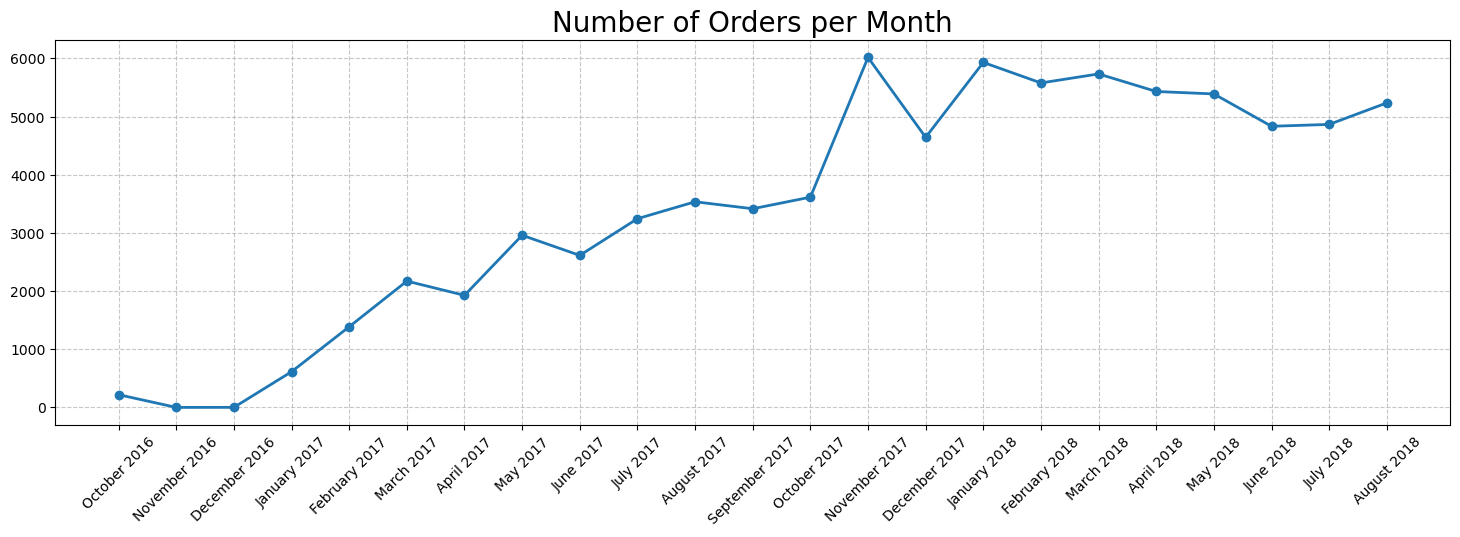

In [61]:
# Membuat total_orders_df yang berisi total order, total revenue, dan total customer berdasarkan bulan dan tahun
total_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'price': 'sum'
})
total_orders_df.index = total_orders_df.index.strftime('%B %Y')
 
total_orders_df = total_orders_df.reset_index()
total_orders_df.rename(columns={
    'order_id': 'order_count',
    'price': 'revenue'
}, inplace=True)
 
total_orders_df

# Membuat visualisasi total order per bulan
plt.figure(figsize=(18, 5))
plt.plot(total_orders_df['order_purchase_timestamp'], total_orders_df['order_count'], marker='o', linewidth=2, color='tab:blue')
plt.title('Number of Orders per Month', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

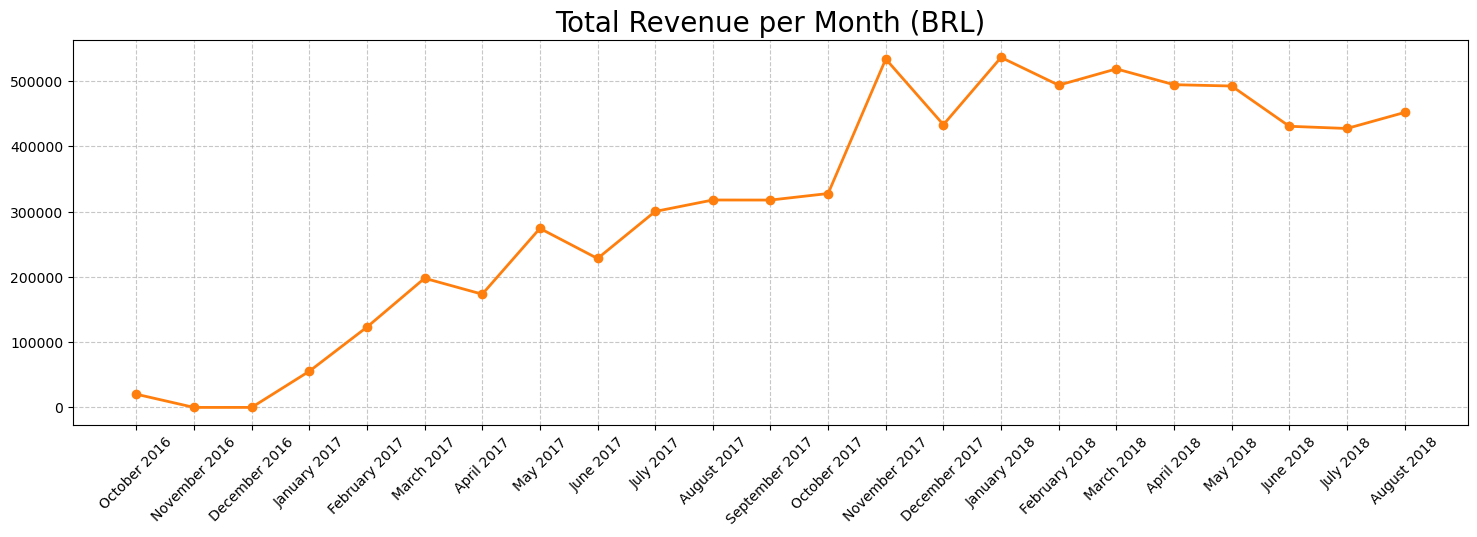

In [62]:
# Membuat visualisasi total revenue/pendapatan per bulan
plt.figure(figsize=(18, 5))
plt.plot(total_orders_df['order_purchase_timestamp'], total_orders_df['revenue'], marker='o', linewidth=2, color='tab:orange')
plt.title('Total Revenue per Month (BRL)', loc='center', fontsize=20) # Asumsi satuan harga menggunakan BRL (Brazilian Real) karena data nama-nama kota berasal dari Brazil
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2: Bagaimana performa pengiriman barang ke pelanggan?

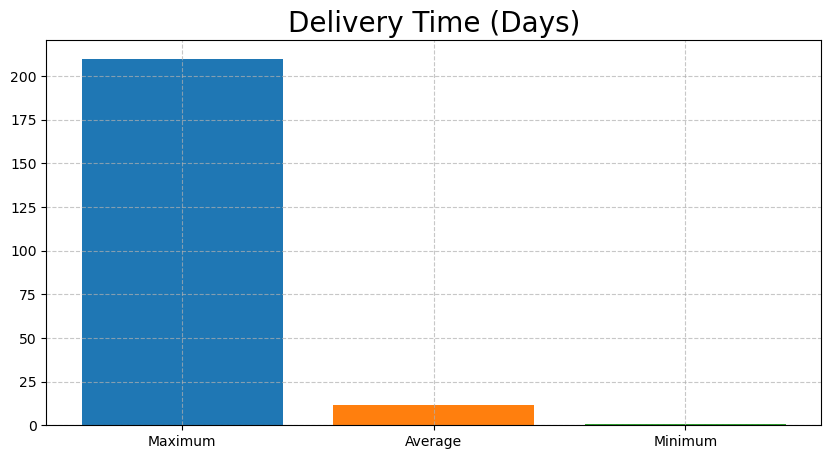

In [63]:
# Membuat visualisasi bar chart lama pengiriman maksimum, rata-rata, dan minimum dari kolom 'delivery_time_day'
plt.figure(figsize=(10, 5))
plt.bar(['Maximum', 'Average', 'Minimum'], 
    [all_df['delivery_time_day'].max(), 
     all_df['delivery_time_day'].mean(), 
     all_df['delivery_time_day'].min()], 
    color=['tab:blue', 'tab:orange', 'tab:green'])
plt.title('Delivery Time (Days)', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 3: Metode pembayaran apa yang paling dominan digunakan oleh pelanggan?

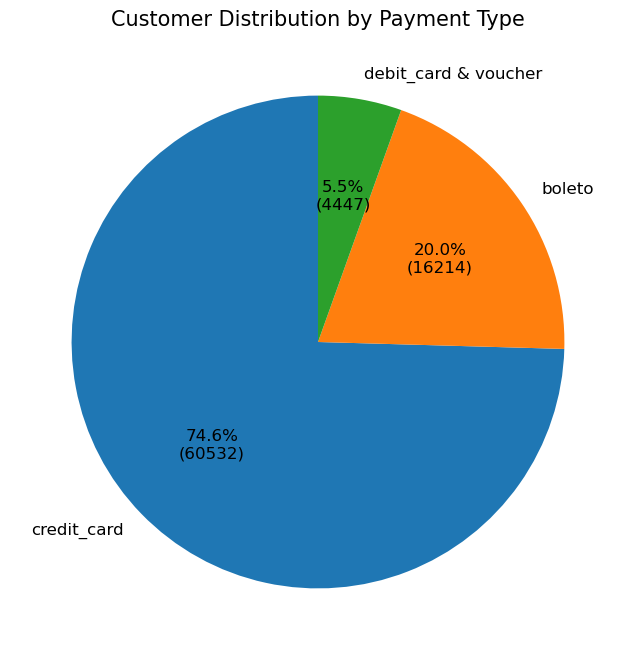

In [64]:
# Menampilkan metode pembayaran yang paling banyak digunakan
bypayment_type_df = all_df.groupby(by='payment_type').customer_id.nunique().reset_index()
bypayment_type_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)
bypayment_type_df.sort_values(by='customer_count', ascending=False, inplace=True)

bypayment_type_df.loc[bypayment_type_df['payment_type'].isin(['debit_card', 'voucher']), 'payment_type'] = 'debit_card & voucher'
bypayment_type_df = bypayment_type_df.groupby('payment_type', as_index=False).sum()
bypayment_type_df.sort_values(by='customer_count', ascending=False, inplace=True)

plt.figure(figsize=(8, 8))
colors_ = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

plt.pie(
    bypayment_type_df['customer_count'],
    labels=bypayment_type_df['payment_type'],
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(bypayment_type_df["customer_count"]) / 100)})',
    colors=colors_[:len(bypayment_type_df)],
    startangle=90,
    textprops={'fontsize': 12}
)

plt.title('Customer Distribution by Payment Type', fontsize=15)
plt.show()


### Pertanyaan 4 : Negara mana saja yang menjadi pelanggan terbanyak?

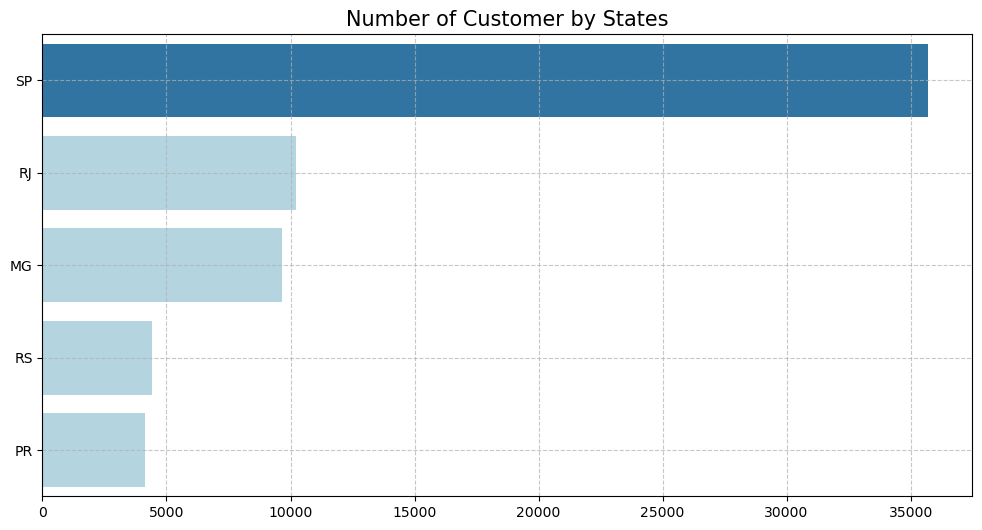

In [65]:
# Menampilkan 10 negara dengan jumlah customer terbanyak menggunakan bar chart horizontal
bystate_df = all_df.groupby(by='customer_state').customer_id.nunique().reset_index()
bystate_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)
bystate_df.sort_values(by='customer_count', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
colors_ = ['tab:blue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']

sns.barplot(
    x='customer_count',
    y='customer_state',
    data=bystate_df.head(),
    palette=colors_,
    hue='customer_state',
    dodge=False,
    legend=False
)
plt.title('Number of Customer by States', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 5: Kota mana saja yang menjadi pelanggan terbanyak?

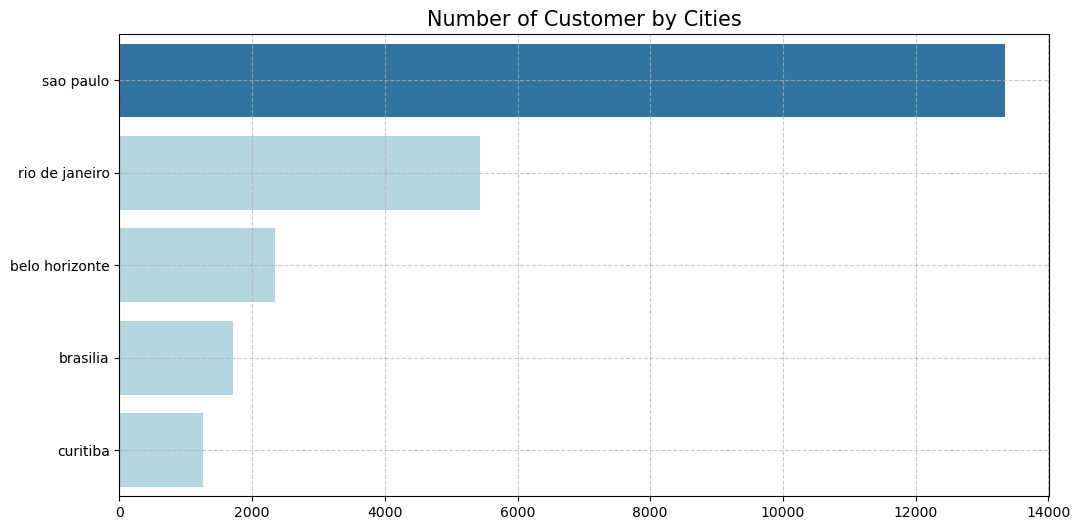

In [66]:
# Menampilkan 10 kota dengan jumlah customer terbanyak menggunakan bar chart horizontal
bycity_df = all_df.groupby(by='customer_city').customer_id.nunique().reset_index()
bycity_df.rename(columns={
    'customer_id': 'customer_count'
}, inplace=True)
bycity_df.sort_values(by='customer_count', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
colors_ = ['tab:blue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']

sns.barplot(
    x='customer_count',
    y='customer_city',
    data=bycity_df.head().sort_values(by='customer_count', ascending=False),
    palette=colors_,
    hue='customer_city',
    dodge=False,
    legend=False
)
plt.title('Number of Customer by Cities', loc='center', fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Tren penjualan dan pendapatan mengalami kenaikan dari waktu ke waku
- Tipe pembayaran yang paling sering dipakai adalah Credit Card
- Kota dengan customer terbanyak adalah Sao Paulo

## Analisis Lanjutan (Opsional)

### Pertanyaan 6 : (RFM Analysis) Kapan waktu transaksi terakhir yang dilakukan oleh pelanggan?
### Pertanyaan 7 : (RFM Analysis) Seberapa sering pelanggan melakukan pembelian dalam kurun waktu beberapa bulan terakhir?
### Pertanyaan 8 : (RFM Analysis) Berapa rata-rata pengeluaran pelanggan dalam beberapa bulan terakhir?

In [67]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp': 'max', # mengambil tanggal order terakhir
    'order_id': 'nunique', # menghitung jumlah order
    'price': 'sum' # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency_day'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df

,customer_id,frequency,monetary,recency_day
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149
...,...,...,...,...
79366,fffcb937e9dd47a13f05ecb8290f4d3e,1,78.00,165
79367,fffecc9f79fd8c764f843e9951b11341,1,164.70,153
79368,fffeda5b6d849fbd39689bb92087f431,1,47.90,99
79369,ffff42319e9b2d713724ae527742af25,1,199.90,77


In [68]:
print(str(int('00012a2ce6f8dcda20d059ce98491703', 16)))


6047715583447631971912177695659779


C:\Users\Azhar\AppData\Local\Temp\ipykernel_23124\80406890.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='customer_id', x='recency_day', data=rfm_df.sort_values(by='recency_day', ascending=True).head(10), palette=colors, ax=ax[0])
C:\Users\Azhar\AppData\Local\Temp\ipykernel_23124\80406890.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='customer_id', x='frequency', data=rfm_df.sort_values(by='frequency', ascending=False).head(10), palette=colors, ax=ax[1])
C:\Users\Azhar\AppData\Local\Temp\ipykernel_23124\80406890.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=Fa

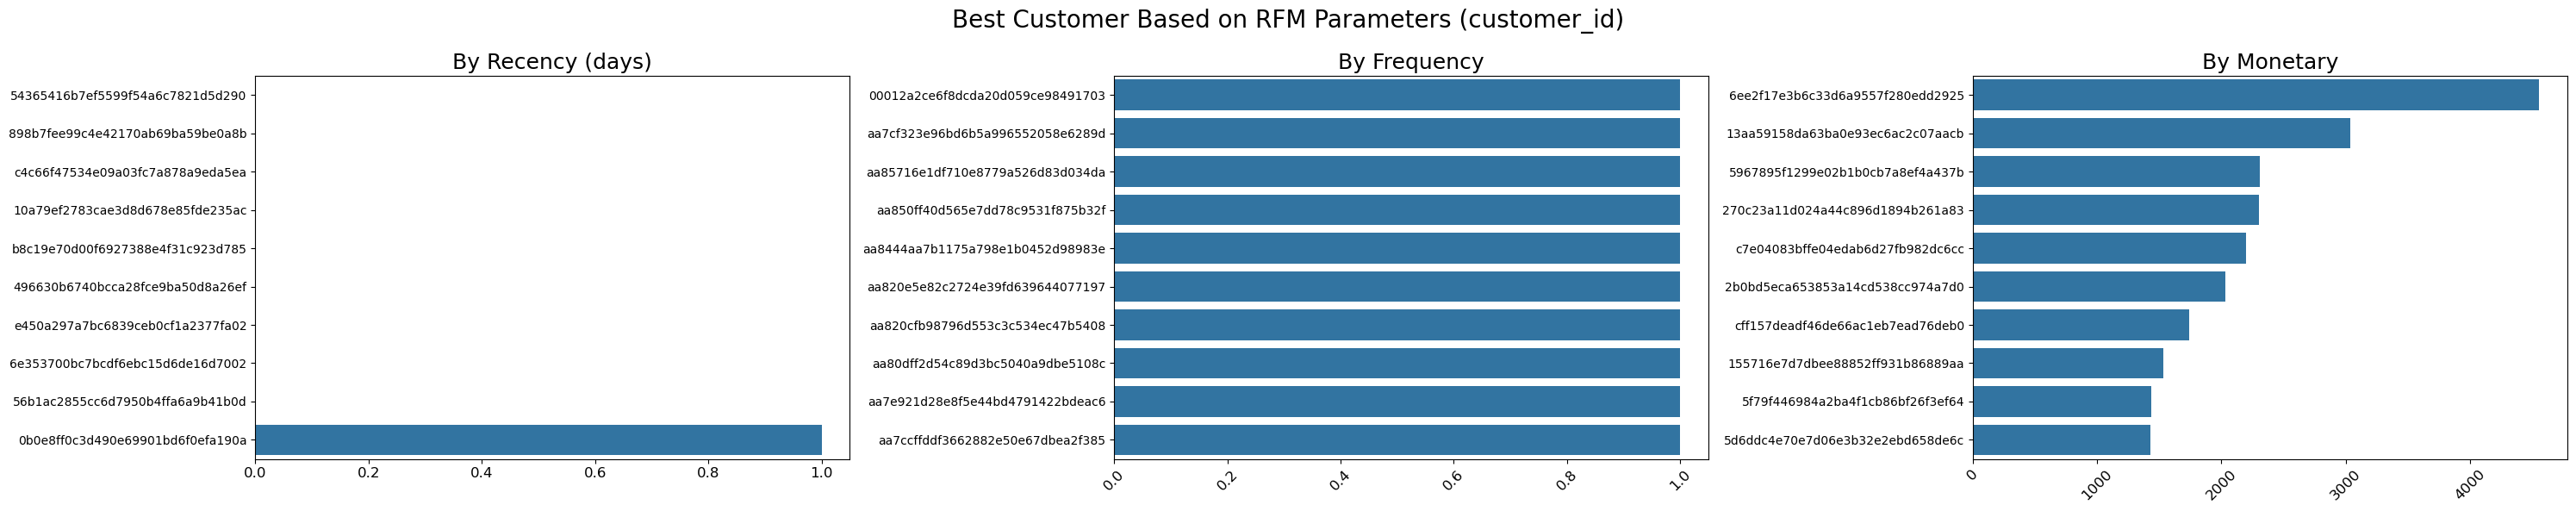

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ['tab:blue'] * 10  # Menggunakan warna 'tab:blue' untuk semua bar

sns.barplot(y='customer_id', x='recency_day', data=rfm_df.sort_values(by='recency_day', ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (days)', loc='center', fontsize=18)
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(y='customer_id', x='frequency', data=rfm_df.sort_values(by='frequency', ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=12, rotation=45)

sns.barplot(y='customer_id', x='monetary', data=rfm_df.sort_values(by='monetary', ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=12, rotation=45)

plt.tight_layout()
plt.suptitle('Best Customer Based on RFM Parameters (customer_id)', fontsize=20)
plt.subplots_adjust(top=0.85)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Tren penjualan dan pendapatan mengalami kenaikan dari waktu ke waku secara signifikan
- Conclution pertanyaan 2 :Waktu rata-rata pengiriman barang tergolong lama, yaitu hampir mencapai dua minggu.
- Conclution pertanyaan 3 : Metode pembayaran yang paling dominan digunakan adalah kartu kredit. Oleh karena itu, disarankan untuk memberikan kemudahan dalam penggunaan metode ini guna mempertahankan loyalitas pelanggan.
- Conclution pertanyaan 4 : Negara dengan jumlah pelanggan terbanyak memiliki kode alias SP. Maka dari itu, alokasi promosi seperti stan atau kerja sama dengan influencer di wilayah ini dapat dikurangi dan dialihkan ke negara dengan jumlah pelanggan yang masih rendah.
- Conclution pertanyaan 5 : Kota dengan konsentrasi pelanggan tertinggi adalah São Paulo. Disarankan untuk mengurangi aktivitas promosi di kota ini dan memfokuskan strategi pemasaran ke kota-kota dengan pelanggan yang lebih sedikit.
- Conclution pertanyaan 6 : Terdapat sembilan pelanggan yang baru saja melakukan transaksi pada hari yang sama, sehingga memiliki nilai recency sebesar nol hari.
- Conclution pertanyaan 7 : Setiap pelanggan bersifat unik dan tidak ada yang melakukan pemesanan lebih dari satu kali.
- Conclution pertanyaan 8 : Pengeluaran rata-rata pelanggan dalam beberapa bulan terakhir tercatat sebesar BRL90.10.